In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.forecasting.theta import ThetaModel
from statsmodels.tsa.stattools import adfuller

import warnings                               
warnings.filterwarnings('ignore')

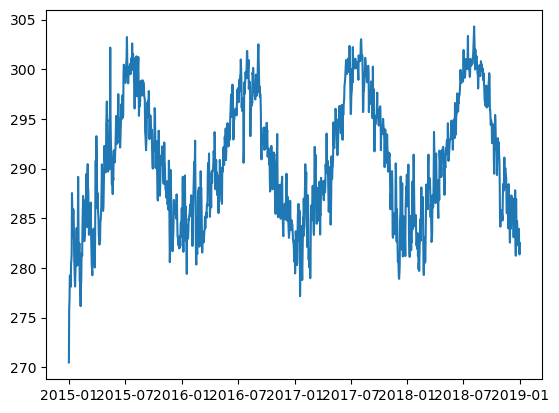

In [7]:
data = pd.read_csv('data/preprocessed_data.csv',parse_dates=['ds'], index_col='ds')['y']
plt.plot(data)

In [11]:
train, test = data[0:-365], data[-365:]

In [12]:
train

ds
2014-12-31    270.475000
2015-01-01    275.986987
2015-01-02    276.784833
2015-01-03    279.203802
2015-01-04    279.260000
                 ...    
2017-12-27    287.150000
2017-12-28    288.150000
2017-12-29    287.691667
2017-12-30    289.390083
2017-12-31    286.594542
Name: y, Length: 1097, dtype: float64

In [13]:
# Now let's try Holt-Winters ETS

#https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

model_1 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=365, damped_trend=False).fit()
model_2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=365, damped_trend=True).fit()
model_3 = ExponentialSmoothing(train, trend="add", seasonal="mul", seasonal_periods=365, damped_trend=True).fit()

In [14]:
pred_1 = pd.DataFrame(model_1.forecast(len(test)))
pred_2 = pd.DataFrame(model_2.forecast(len(test)))
pred_3 = pd.DataFrame(model_3.forecast(len(test)))

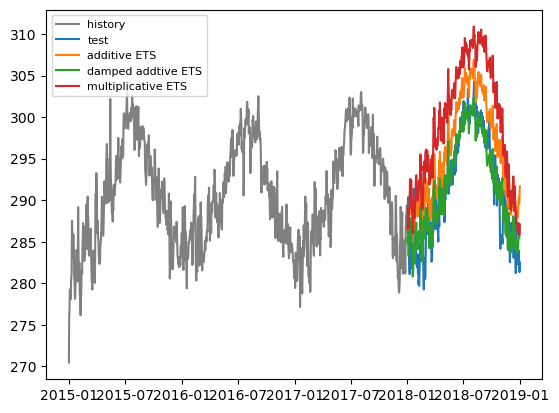

In [15]:
plt.plot(train, label='history', color='grey')
plt.plot(test, label='test')
plt.plot(pred_1, label='additive ETS')
plt.plot(pred_2, label='damped addtive ETS')
plt.plot(pred_3, label='multiplicative ETS')
plt.legend(loc='upper left', fontsize=8)
plt.show()

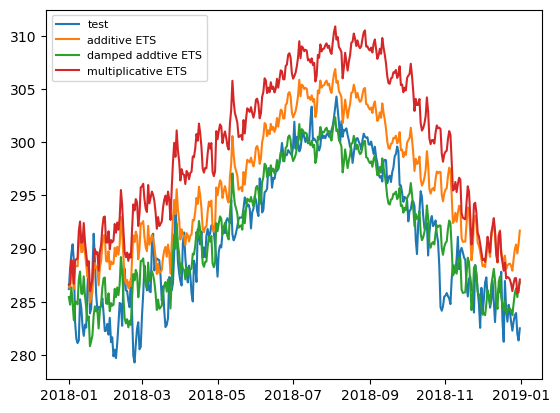

In [16]:
plt.plot(test, label='test')
plt.plot(pred_1, label='additive ETS')
plt.plot(pred_2, label='damped addtive ETS')
plt.plot(pred_3, label='multiplicative ETS')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [18]:
#Now let's try some Theta models
model_4 = ThetaModel(train)
res = model_4.fit()
pred = res.forecast(len(test))

In [19]:
pred_4 = pd.DataFrame(pred.values, index=pred_3.index)

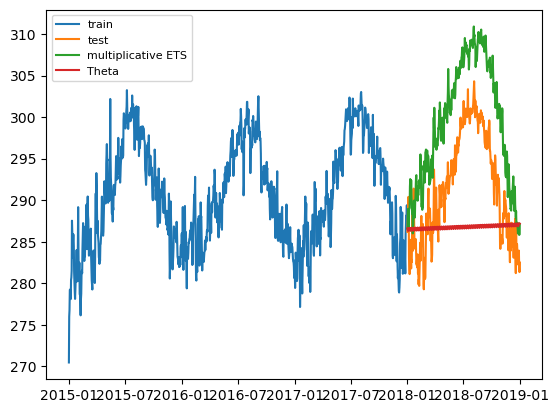

In [20]:
plt.plot(train, label='train')
plt.plot(test, label='test')
plt.plot(pred_3, label='multiplicative ETS')
plt.plot(pred_4, label='Theta')
plt.legend(loc='upper left', fontsize=8)
plt.show()